In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utils.packet_parser import parse_csv, parse_cc2dc_packet

In [3]:
# Step 1: Load all CSV files in the 'attack' directory
attack_dir = "attack"
dataframes = []
for file in os.listdir(attack_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(attack_dir, file)
        attack_type = ''.join([char for char in file.split('.')[0] if not char.isdigit()])
        try:
            # Parse the CSV file using the packet parser
            parsed_data = parse_csv(file_path)
            # Convert parsed data into a DataFrame
            df = pd.DataFrame(parsed_data)
            df['Attack_Type'] = attack_type  # Add a column for the attack type
            dataframes.append(df)
        except Exception as e:
            print(f"Error parsing {file_path}: {e}")

# Combine all data into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)
display(all_data.head())

,CC_Name,Timestamp,Stats,Attack_Type
0,cc1,2025-04-13T21:25:09.649,"{'fe:c4:b5:78:2f:6b': {'Number of Ports': '6',...",syn
1,cc1,2025-04-13T21:25:13.979,"{'fe:c4:b5:78:2f:6b': {'Number of Ports': '6',...",syn
2,cc1,2025-04-13T21:25:18.523,{},syn
3,cc1,2025-04-13T21:25:23.099,"{'fe:c4:b5:78:2f:6b': {'Number of Ports': '6',...",syn
4,cc1,2025-04-13T21:25:27.740,"{'fe:c4:b5:78:2f:6b': {'Number of Ports': '6',...",syn


In [4]:
all_data['Stats'] = all_data['Stats'].apply(
    lambda x: list(x.values())[0] if isinstance(x, dict) and len(x) > 0 else None
)
stats_data = pd.json_normalize(all_data['Stats'])
all_data_flattened = pd.concat([all_data.drop(columns=['Stats']), stats_data], axis=1)
display(all_data_flattened.head())

,CC_Name,Timestamp,Attack_Type,Number of Ports,Latest Timestamp,Oldest Timestamp,Total Packets,Total Bytes,Total Errors,Total Rx Packets,...,Average Rx Packets,Average Rx Bytes,Average Rx Errors,Average Tx Packets,Average Tx Bytes,Average Tx Errors,Average Rx Utilization,Average Tx Utilization,Average Throughput (Mbps),Average Buffer Occupancy
0,cc1,2025-04-13T21:25:09.649,syn,6,2025-04-13 21:25:07.801000,2025-04-13 21:25:05.744000,2.5934871153147836,2336.0357917324463,0.0,1.4588423256182685,...,0.0,0.0027482834053052098,0.0,0.0,0.24314038760304477,195.7773242254365,0.0,0.18910746494941924,193.56197439663785,0.0
1,cc1,2025-04-13T21:25:13.979,syn,6,2025-04-13 21:25:12.183000,2025-04-13 21:25:10.725000,3.081629596220574,3316.260161571479,0.0,1.7117838886173886,...,0.0,0.003904537515011647,0.0,0.0,0.28529731476956477,277.52330224942176,0.0,0.22830761793386425,275.18672467915803,0.0
2,cc1,2025-04-13T21:25:18.523,syn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cc1,2025-04-13T21:25:23.099,syn,6,2025-04-13 21:25:21.225000,2025-04-13 21:25:19.633000,2.865107759223428,1797.0245218136301,0.0,1.583253108968044,...,0.0,0.003332063971659483,0.0,0.0,0.26387551816134064,149.99200961966133,0.0,0.21364244170923075,149.512077349277,0.0
4,cc1,2025-04-13T21:25:27.740,syn,6,2025-04-13 21:25:25.722000,2025-04-13 21:25:24.185000,4.654779691469144,3311.1746968400307,0.0,2.652694360345456,...,0.0,0.003687651977628986,0.0,0.0,0.44211572672424265,278.1541389198436,0.0,0.33368088852061456,273.70831055349487,0.0


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
def is_convertible_to_float(series):
    try:
        series.astype(float)
        return True
    except ValueError:
        return False

In [7]:
numeric_columns = [col for col in all_data_flattened.columns if is_convertible_to_float(all_data_flattened[col])]
numeric_data = all_data_flattened[numeric_columns]
columns_to_keep = ['CC_Name', 'Attack_Type']
numeric_data[columns_to_keep] = all_data_flattened[columns_to_keep]

columns_to_keep = ['CC_Name', 'Attack_Type']
numeric_data[columns_to_keep] = all_data_flattened[columns_to_keep]
numeric_data = numeric_data.astype(float, errors='ignore')
numeric_data = numeric_data.fillna(0)

display(numeric_data.head())

/tmp/ipykernel_203831/2093853316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data[columns_to_keep] = all_data_flattened[columns_to_keep]
/tmp/ipykernel_203831/2093853316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data[columns_to_keep] = all_data_flattened[columns_to_keep]
/tmp/ipykernel_203831/2093853316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Number of Ports,Total Packets,Total Bytes,Total Errors,Total Rx Packets,Total Rx Bytes,Total Rx Errors,Total Tx Packets,Total Tx Bytes,Total Tx Errors,...,Average Rx Errors,Average Tx Packets,Average Tx Bytes,Average Tx Errors,Average Rx Utilization,Average Tx Utilization,Average Throughput (Mbps),Average Buffer Occupancy,CC_Name,Attack_Type
0,6.0,2.593487,2336.035792,0.0,1.458842,1174.663945,0.0,1.134645,1161.371846,0.0,...,0.0,0.0,0.243140,195.777324,0.0,0.189107,193.561974,0.0,cc1,syn
1,6.0,3.081630,3316.260162,0.0,1.711784,1665.139813,0.0,1.369846,1651.120348,0.0,...,0.0,0.0,0.285297,277.523302,0.0,0.228308,275.186725,0.0,cc1,syn
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,cc1,syn
3,6.0,2.865108,1797.024522,0.0,1.583253,899.952058,0.0,1.281855,897.072464,0.0,...,0.0,0.0,0.263876,149.992010,0.0,0.213642,149.512077,0.0,cc1,syn
4,6.0,4.654780,3311.174697,0.0,2.652694,1668.924834,0.0,2.002085,1642.249863,0.0,...,0.0,0.0,0.442116,278.154139,0.0,0.333681,273.708311,0.0,cc1,syn


In [8]:
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data.drop(columns=columns_to_keep))

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data_scaled)

In [10]:
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df[columns_to_keep] = numeric_data[columns_to_keep].reset_index(drop=True)

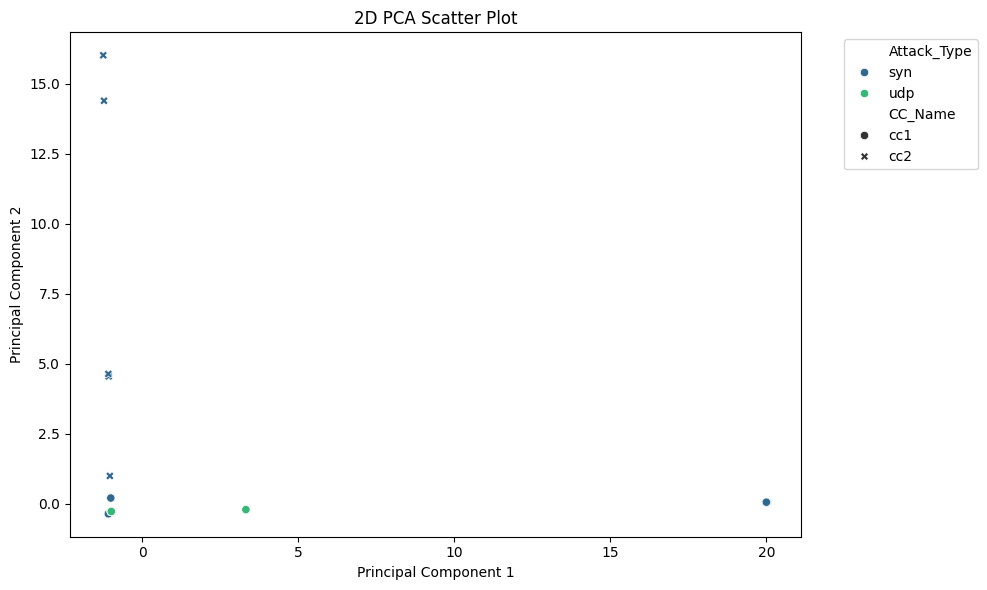

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Attack_Type', 
    style='CC_Name', 
    data=pca_df, 
    palette='viridis'
)
plt.title('2D PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()